# Trinucleotide genome composition in EV Fig 2C and 2D

In [1]:
from collections import Counter
from collections import defaultdict
import json

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Rectangle
import numpy as np
import pandas as pd

In [2]:
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

In [3]:
sorted_trinuc = []
for ref in ['C', 'T']: 
    for nuc5 in ['A', 'C', 'G', 'T']: 
        for nuc3 in ['A', 'C', 'G', 'T']: 
            sorted_trinuc.append(nuc5+ref+nuc3)
len(sorted_trinuc)

32

In [4]:
colors_d = {
    'C': '#adabadff', 
    'T': '#636163ff'
}

In [5]:
data_dir = '../../../data/genomic_bin_data'

### Load data

JSON file containing trinucleotide counts across mappable megabases

In [6]:
trinuc_f = f'{data_dir}/hg38_1000kb_bin.nodrivers.filtered.mappable_positions.autosomes.trinuc_per_bin.json'
with open(trinuc_f, 'r') as fd: 
    trinuc_counts_per_bin = json.load(fd)

In [7]:
len(trinuc_counts_per_bin.keys())

2196

In [8]:
# Get total counts across megabases
trinuc_counts = dict()
trinuc_counts_per_bin = dict([(k, v) for k, v in trinuc_counts_per_bin.items()])
for binid, data in trinuc_counts_per_bin.items(): 
    if trinuc_counts: 
        trinuc_counts = Counter(trinuc_counts) + Counter(data)
    else: 
        trinuc_counts = Counter(data)
total_counts = sum(trinuc_counts.values())
total_counts

2012091115

In [9]:
# Normalise
trinuc_counts_norm = dict([(k, v/total_counts) for k, v in trinuc_counts.items()])

In [10]:
# Calculate the relative frequency of each trinucleotide in a bin 
trinc_density_per_bin = defaultdict(list)
for binid, data in trinuc_counts_per_bin.items(): 
    binid_length = sum(data.values())
    for trinuc, counts in data.items(): 
        trinc_density_per_bin[trinuc].append(100*counts/binid_length)

In [11]:
sorted_trinucs_frequency = dict([(n, np.median(f)) for n, f in trinc_density_per_bin.items()])
sorted_trinucs_frequency = [k for k, v in sorted(sorted_trinucs_frequency.items(), key=lambda item: item[1])]

## Panel EV2C

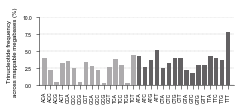

In [12]:
fig = plt.figure(figsize=(3.5, 1.25))
ax = plt.subplot2grid((1, 1), (0, 0))
ax.set_ylabel('Trinucleotide frequency\nacross mappable megabases (%)', fontsize=6)
plt.rc('axes', edgecolor='black')

labels = []
for i, trinuc in enumerate(sorted_trinuc, 0): 
    labels.append(trinuc)
    color = colors_d[trinuc[1]]
    y = 100*trinuc_counts_norm[trinuc]
    bar = ax.bar(i, y, width=0.75, align='center', color=color, alpha=1, zorder=1)

ax.set_xlim(-1, 32)
ax.set_xticks(list(range(0, 32)))
ax.set_xticklabels(labels, rotation=90, fontsize=5, ha='center')
yticks = [0.0, 2.5, 5.0, 7.5, 10.0]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=5)
for i in yticks: 
    ax.axhline(y=i, ls='--', linewidth=0.25, color='grey', zorder=0)
ax.spines['left'].set(lw=0.5)
ax.spines['bottom'].set(lw=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.setp(ax.yaxis.get_ticklines(), 'markeredgewidth', 0.5)
plt.setp(ax.xaxis.get_ticklines(), 'markeredgewidth', 0.5)

for extension in ['png', 'svg']: 
    output = f'./fig_EV2C.{extension}'
    plt.savefig(output, bbox_inches='tight', dpi=350)

## Panel EV2D

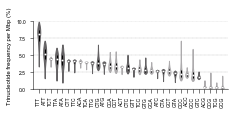

In [13]:
fig = plt.figure(figsize=(3.5, 1.25))
ax = plt.subplot2grid((1, 1), (0, 0))
ax.set_ylabel('Trinucleotide frequency per Mbp (%)', fontsize=6)

labels = []
for i, nucleotide in enumerate(sorted_trinucs_frequency[::-1]): 
    y = trinc_density_per_bin[nucleotide]
    x = [i] * len(y)
    labels += [nucleotide]
    color = colors_d[nucleotide[1]]
    parts = ax.violinplot(y, positions=[i], showmeans=False, showmedians=False, showextrema=False)
    for pc in parts['bodies']:
        pc.set_facecolor(color)
        pc.set_edgecolor(color)
        pc.set_alpha(1)
        pc.set_zorder(2)

    quartile1, medians, quartile3 = np.percentile(y, [25, 50, 75])
    inds = [np.mean(x)]
    ax.scatter(inds, medians, marker='.', color='white', s=3, zorder=3)
    ax.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=1)

ax.set_xlim(-1, 32)
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, fontsize=5, rotation=90, ha='center')
ax.set_ylim(0, 10)
yticks = [0.0, 2.5, 5.0, 7.5, 10.0]
ax.set_yticks(yticks)
ax.set_yticklabels(yticks, fontsize=5)
for i in yticks: 
    ax.axhline(y=i, ls='--', linewidth=0.25, color='grey', zorder=0)

ax.spines['left'].set(lw=0.5)
ax.spines['bottom'].set(lw=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.setp(ax.yaxis.get_ticklines(), 'markeredgewidth', 0.5)
plt.setp(ax.xaxis.get_ticklines(), 'markeredgewidth', 0.5)

for extension in ['png', 'svg']: 
    output = f'./fig_EV2D.{extension}'
    plt.savefig(output, bbox_inches='tight', dpi=350)